# **Regresión  Lineal**

### **Paso 1: Recopilación de Datos**

Supongamos que tienes un conjunto de datos que contiene observaciones de las ventas, el presupuesto de marketing y el número de empleados de una empresa comercial. Los datos se recopilan previamente en un archivo CSV llamado "datos_comerciales.csv".

In [ ]:
# Establecer una semilla para la reproducibilidad
set.seed(123)

# Crear un conjunto de datos simulados
n <- 100  # Número de observaciones
Presupuesto <- rnorm(n, mean = 10000, sd = 2000)  # Datos de presupuesto simulados
Empleados <- rnorm(n, mean = 5, sd = 1)  # Datos de empleados simulados
Ventas <- 5000 + 3 * Presupuesto + 1000 * Empleados + rnorm(n, mean = 0, sd = 2000)  # Datos de ventas simulados

# Crear un DataFrame con los datos simulados
simulated_data <- data.frame(Ventas, Presupuesto, Empleados)


### **Paso 2: Exploración de Datos**

Antes de construir el modelo, es importante explorar los datos para comprender su distribución y detectar posibles relaciones. Puedes utilizar bibliotecas como "dplyr" y "ggplot2" para este propósito en R.

In [ ]:
# Ajustar el modelo lineal a los datos simulados
model <- lm(Ventas ~ Presupuesto + Empleados, data = simulated_data)

# Ver el resumen del modelo
summary(model)


Call:
lm(formula = Ventas ~ Presupuesto + Empleados, data = simulated_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3746.0 -1321.5  -248.9  1242.7  4159.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6363.7333  1488.9025   4.274 4.49e-05 ***
Presupuesto    2.8668     0.1049  27.337  < 2e-16 ***
Empleados   1047.6226   197.9894   5.291 7.53e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1903 on 97 degrees of freedom
Multiple R-squared:  0.8872,	Adjusted R-squared:  0.8849 
F-statistic: 381.4 on 2 and 97 DF,  p-value: < 2.2e-16


### **Paso 3: Visualización de los Resultados**

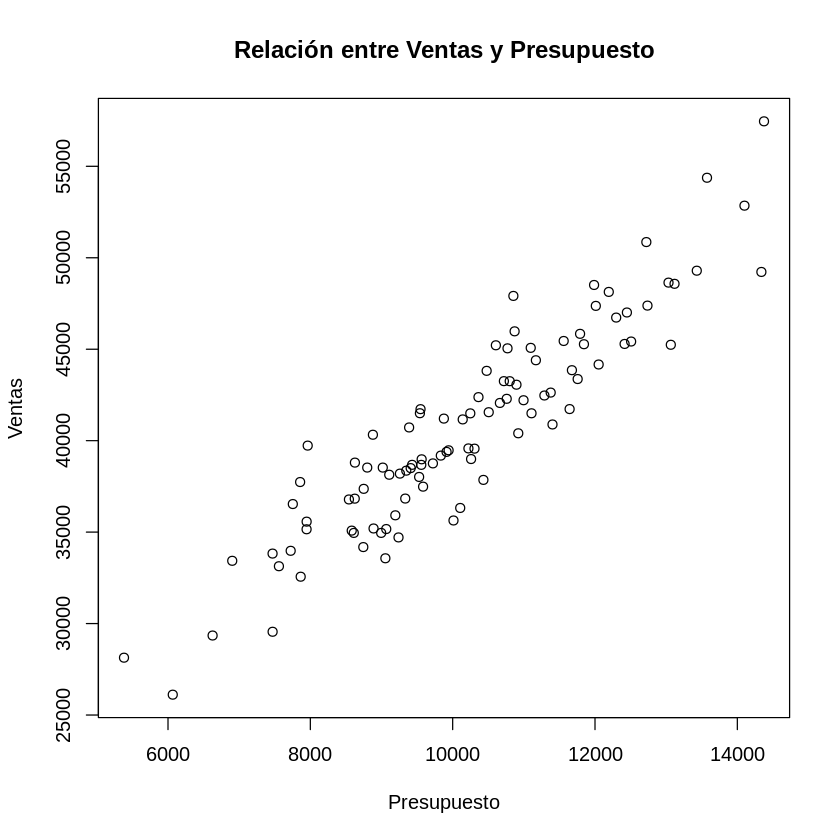

In [ ]:
# Gráfico de dispersión de Ventas vs. Presupuesto
plot(simulated_data$Presupuesto, simulated_data$Ventas,
     xlab = "Presupuesto", ylab = "Ventas", main = "Relación entre Ventas y Presupuesto")

# Añadir la línea de regresión
#abline(model, col = "red")

Esto generará un modelo de regresión lineal basado en los datos simulados y proporcionará un resumen de las estadísticas del modelo. Además, se crea un gráfico de dispersión que muestra la relación entre las ventas y el presupuesto con la línea de regresión ajustada.

Si ejecutas este código en R, obtendrás un ejemplo completo de regresión lineal con datos simulados y visualización de los resultados. Puedes personalizar y ajustar el ejemplo según tus necesidades.

### **Paso 5: Evaluación del Modelo**

El modelo se evalúa utilizando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²) en el conjunto de prueba. Estas métricas indicarán la precisión del modelo.

**1. Cálculo del Error Cuadrático Medio (MSE):**

El MSE es una métrica que mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo a los datos.

In [ ]:
# Calcular las predicciones del modelo
predictions <- predict(model, newdata = simulated_data)

# Calcular el error cuadrático medio (MSE)
mse <- mean((predictions - simulated_data$Ventas)^2)
print(paste("Error Cuadrático Medio (MSE):", mse))


[1] "Error Cuadrático Medio (MSE): 3511274.6251821"


**2. Cálculo del Coeficiente de Determinación (R²):**

El coeficiente de determinación (R²) proporciona información sobre la proporción de la varianza en la variable de respuesta (Ventas) que es explicada por el modelo. Un R² más alto indica que el modelo se ajusta mejor a los datos.

In [ ]:
# Calcular el coeficiente de determinación (R²)
rsquared <- summary(model)$r.squared
print(paste("Coeficiente de Determinación (R²):", rsquared))

[1] "Coeficiente de Determinación (R²): 0.887190595890585"


**3. Validación Cruzada (Cross-Validation):**

La validación cruzada es una técnica que divide los datos en conjuntos de entrenamiento y prueba repetidamente para evaluar el modelo en diferentes subconjuntos de datos. Esto ayuda a verificar si el modelo es robusto y generaliza bien.


El código que proporcionaste realiza la validación cruzada en un modelo de regresión lineal. Aquí se explica paso a paso:

1. Se instala y carga la biblioteca "caret" que se utiliza para realizar el análisis.

2. Se establece una semilla aleatoria con set.seed(123) para asegurarse de que los resultados sean reproducibles.

3. Se realiza la validación cruzada con 10 folds. Esto significa que el conjunto de datos se divide en 10 partes iguales (folds), y se ajusta el modelo de regresión lineal en 10 iteraciones. En cada iteración, se utiliza una parte diferente como conjunto de prueba y las otras 9 partes se utilizan como conjunto de entrenamiento.

4. En la función train(), se especifican los siguientes argumentos:

* Ventas ~ Presupuesto + Empleados: Se define la fórmula del modelo de regresión, donde "Ventas" es la variable dependiente y "Presupuesto" y "Empleados" son las variables predictoras.

* data = simulated_data: Se especifica el conjunto de datos en el que se realizará la validación cruzada, que parece ser llamado "simulated_data".

* method = "lm": Se utiliza el método de regresión lineal para ajustar el modelo.

* trControl = trainControl(method = "cv", number = 10): Se configura el control de entrenamiento para realizar la validación cruzada con 10 folds.

5. Después de realizar la validación cruzada, se imprimen las métricas de evaluación en la consola. En este caso, se calcula y muestra la raíz del error cuadrático medio (RMSE) promedio de las 10 iteraciones. El RMSE es una medida de la precisión de un modelo de regresión. Un valor más bajo indica un mejor ajuste del modelo a los datos.

En resumen, este código realiza la validación cruzada en un modelo de regresión lineal para evaluar su rendimiento utilizando el RMSE como métrica de evaluación. La validación cruzada se realiza con 10 folds para obtener una estimación más precisa del rendimiento del modelo.

In [ ]:
# Realizar validación cruzada con 10 folds
install.packages("caret")
library(caret)
set.seed(123)
cv_results <- train(
  Ventas ~ Presupuesto + Empleados,
  data = simulated_data,
  method = "lm",
  trControl = trainControl(method = "cv", number = 10)
)

# Obtener métricas de evaluación de la validación cruzada
print(paste("Validación Cruzada - Error RMSE:", sqrt(cv_results$results$RMSE)))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



[1] "Validación Cruzada - Error RMSE: 43.3484106871283"


RMSE de 43.35 significa que, en promedio, las predicciones del modelo de regresión lineal tienen un error de aproximadamente 43.35 unidades en la variable de respuesta "Ventas". En otras palabras, las predicciones del modelo pueden variar en promedio alrededor de 43.35 unidades por encima o por debajo de los valores reales de ventas.



### **Paso 6: Predicción**

In [ ]:
# Crear un nuevo conjunto de datos para realizar predicciones
nuevos_datos <- data.frame(Presupuesto = c(80000, 95000, 110000),
                          Empleados = c(6, 8, 10))

# Realizar predicciones con el modelo
predicciones_ventas <- predict(model, newdata = nuevos_datos)
print("Predicciones de Ventas:")
print(predicciones_ventas)

[1] "Predicciones de Ventas:"
       1        2        3 
241995.7 287093.4 332191.1 


Las predicciones de ventas se almacenan en "predicciones_ventas".

* Aplicación Comercial: Las predicciones pueden ser aplicadas en un contexto comercial de varias maneras:

* Toma de Decisiones: Las predicciones pueden ayudar a la empresa a tomar decisiones informadas sobre asignación de recursos, presupuesto publicitario, contratación de empleados y más.

* Optimización de Recursos: Al predecir las ventas futuras, la empresa puede optimizar la gestión de recursos y presupuesto para maximizar los ingresos y minimizar los costos.

* Planificación Estratégica: Las predicciones pueden respaldar la planificación estratégica al proporcionar información sobre cómo las variables independientes (presupuesto y empleados) afectan las ventas.

* Evaluación de Escenarios: La empresa puede evaluar diferentes escenarios al cambiar los valores de presupuesto y empleados y ver su impacto en las ventas proyectadas.

* Seguimiento de Desempeño: Una vez que se implementen las estrategias basadas en las predicciones, se pueden comparar las ventas reales con las proyectadas para evaluar el desempeño y ajustar las estrategias según sea necesario.

* Optimización de Marketing: Si se asocian las variables de presupuesto con estrategias de marketing y publicidad, las predicciones pueden guiar la inversión publicitaria.

* Planificación de Inventarios: Las predicciones de ventas también pueden respaldar la planificación de inventarios y la gestión de la cadena de suministro.

En resumen, las predicciones de un modelo de regresión lineal pueden ser valiosas para la planificación estratégica y la toma de decisiones en un entorno empresarial. Ayudan a comprender la relación entre las variables independientes y la variable dependiente y a anticipar cómo los cambios en esas variables afectarán las ventas futuras.